# File Information

- **Filename:** testing.py
- **Project:** Vanderbilt MoveVU Data Analysis and Server
- **Author:** Syed Ali
- **Description:** This file contains the code for testing the data analysis on the Q2 Vanderbilt WeGo Data.
- **Detailed Analysis**

## Detailed WeGo Test Data Analysis Priorities

- Transit Ridership (total VU Rides on WeGo)
  - Year over year, month to month comparison
  - Analysis period: 2019 to present
- VU Rides on local WeGo services
- VU Rides on Regional Transit Authority (RTA)
- VU Rides on WeGo Access
- Top 6 VU Ridership by Routes, including changes over time
- Total VU Rides on WeGo by University Roles (Faculty, Staff, Grad/Professional, Undergrad)
  - By class, Freshman, Sophomore, etc.
  - By school
  - By division

## Data Schema

- CARDOFFICE_CARD_NUMBER
- CAMPUS_ID
- FIRST_NAME
- LAST_NAME
- EMPLOYEE_OR_STUDENT
- CARD_ID_STATUS
- RIDE_DATE
- BUS
- ROUTE
- RUN
- GPR_CORE_ID
- CREATE_DATE


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
TESTING_BUS_FILE_CSV = "WeGoAllData.csv"
# Q2 DATA ANALYSIS
# Reading CSV data into a Pandas DataFrame
df = pd.read_csv(TESTING_BUS_FILE_CSV)

print("Data Fields:", df.columns.values)
print("Total Number of Vanderbilt Scans in the We Go Bus System:", df.shape[0])

Data Fields: ['CARDOFFICE_CARD_NUMBER' 'CAMPUS_ID' 'FIRST_NAME' 'LAST_NAME'
 'EMPLOYEE_OR_STUDENT' 'CARD_ID_STATUS' 'RIDE_DATE' 'BUS' 'ROUTE' 'RUN'
 'GPR_CORE_ID' 'CREATE_DATE']
Total Number of Vanderbilt Scans in the We Go Bus System: 88310


In [51]:
# Setting up Nashville's Bus Route as a Dictionary

WEGO_FREQUENT_SERVICE = {
    3: "West_End",
    22: "Bordeaux",
    23: "Dickerson_Pike",
    50: "Charlotte_Pike",
    52: "Nolansville_Pike",
    55: "Murfreesboro_Pike",
    56: "Gallatin_Pike"
}

WEGO_LOCAL_SERVICE = {
    4: "Shelby",
    6: "Lebanon_Pike",
    7: "Hillsboro_Pike",
    8: "8th_Avenue_South",
    9: "MetroCenter",
    14: "Whites_Creek",
    17: "12th_Avenue_South",
    18: "Airport",
    19: "Herman",
    28: "Meridian",
    29: "Jefferson",
    34: "Opry Mills",
    41: "Golden Valley",
    42: "St._Cecilia/Cumberland"
}

WEGO_CONNECTOR_SERVICE = {
    70: "Bellevue",
    75: "Midtown",
    76: "Madison",
    77: "Thompson/Wedgewood",
    79: "Skyline"
}

WEGO_EXPRESS_SERVICE = {
    84: "Murfreesboro",
    86: "Smyrna/La_Vergne",
    87: "Gallatin/Hendersonville",
    88: "Dickson",
    89: "Springfield/Joelton",
    94: "Clarksville",
    95: "Spring_Hill/Franklin"
}

# TODO need to find the number for the train system and other missing routes
WEGO_TRAIN_SERVICE = {
    64: "Star_Downtown_Shuttle",
    93: "Star_West_End_Shuttle"
}

WEGO_ALL_ROUTES = {**WEGO_FREQUENT_SERVICE, **WEGO_LOCAL_SERVICE, **WEGO_CONNECTOR_SERVICE, **WEGO_EXPRESS_SERVICE, **WEGO_TRAIN_SERVICE}
list_WE_GO_ALL_ROUTES = list(WEGO_ALL_ROUTES.keys())
list_WE_GO_ALL_ROUTES.sort()
print("Listed Routes:", list_WE_GO_ALL_ROUTES)
print("Number of Routes:", len(list_WE_GO_ALL_ROUTES))


# checking unique routes from the data
unique_routes = list(df['ROUTE'].unique())
unique_routes.sort()
print("Unique Routes:", unique_routes)
set_unique_routes = set(unique_routes)
print("Number of Unique Routes:", len(set_unique_routes))
# seeing what routes are missing from the dictionary
missing_routes_set = set_unique_routes - set(list_WE_GO_ALL_ROUTES)
missing_routes = list(missing_routes_set)
missing_routes.sort()
print("Missing Routes:", missing_routes)
print("Number of Missing Routes:", len(missing_routes))


# Possible Explanation for Missing Routes:
# Missing Routes: [16, 27, 47, 48, 59, 97, 98, 99]
# 16: Old Hickory - Independent section became part of an extended 36 Madison Square
# 16: Madison/Old Hickory - Created on August 10, 2003; eliminated due to budget crisis; service restored in Madison on September 26, 2010, as 76 Madison Connector; rest restored on April 30, 2012, as 27 Old Hickory (eastern portion) and 36 Madison Express (western portion)
# 27: Opryland Hotel
# 27: Old Hickory
# 47: 
# 48:
# 59:
# 97:
# 98:
# 99:

Listed Routes: [3, 4, 6, 7, 8, 9, 14, 17, 18, 19, 22, 23, 28, 29, 34, 41, 42, 50, 52, 55, 56, 64, 70, 75, 76, 77, 79, 84, 86, 87, 88, 89, 93, 94, 95]
Number of Routes: 35
Unique Routes: [3, 4, 6, 7, 8, 9, 14, 16, 17, 18, 19, 22, 23, 27, 28, 29, 34, 41, 42, 47, 48, 50, 52, 55, 56, 59, 75, 76, 77, 79, 84, 86, 87, 88, 89, 93, 94, 95, 97, 98, 99]
Number of Unique Routes: 41
Missing Routes: [16, 27, 47, 48, 59, 97, 98, 99]
Number of Missing Routes: 8


In [52]:
# Data Cleaning First!
# general analysis
# Remove rows with missing values in specific columns (bus, route, run, ride_date)
columns_to_check = ['RIDE_DATE', 'BUS', 'ROUTE', 'RUN']
df = df.dropna(subset=columns_to_check)

# Check how many entries remain
print("Total Number of Vanderbilt Scans in the We Go Bus System:", df.shape[0])

# TODO: Update this when route clarification is given
# Remove Rows with Invalid Bus Route 


Total Number of Vanderbilt Scans in the We Go Bus System: 88310


Total VU Rides on WeGo - month to month comparison (February - April 2023)
List of Unique Months [2, 3, 4]
MONTH
2    27927
3    31329
4    29054
Name: Rides Per Month, dtype: int64


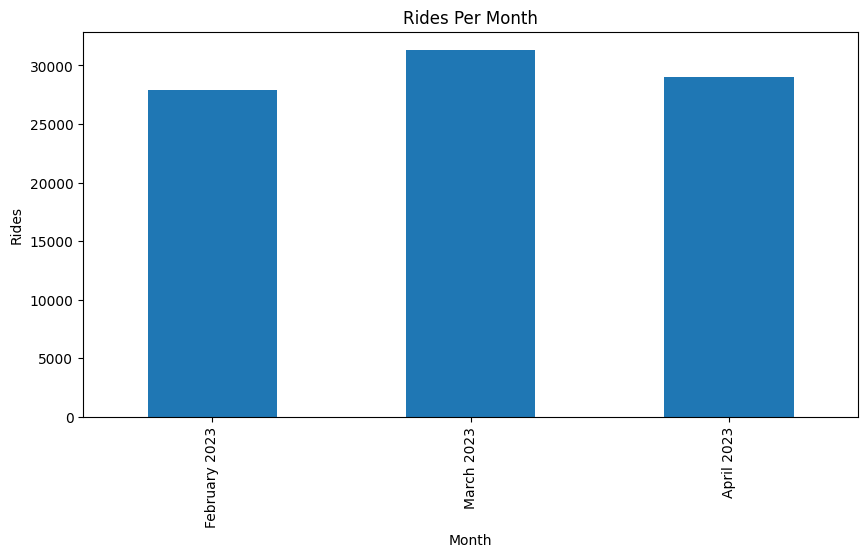

In [63]:
# total VU Rides on WeGo - month to month comparison (February - April 2023)
print("Total VU Rides on WeGo - month to month comparison (February - April 2023)")
# Converting the "RIDE_DATE" and "CREATE_DATE" columns to datetime objects
df['RIDE_DATE'] = pd.to_datetime(df['RIDE_DATE'])
df['CREATE_DATE'] = pd.to_datetime(df['CREATE_DATE'])

# Extract the sum the year and month from the "RIDE_DATE" column
df['MONTH'] = df['RIDE_DATE'].dt.month

month_list = list(df['MONTH'].unique())
month_list.sort()

print("List of Unique Months", month_list)

# TODO: COMMENT THIS FUNCTION
def plot_all_months(monthly_rides):
    # set the header to "Total Rides"
    monthly_rides = monthly_rides.rename("Rides Per Month")
    print(monthly_rides)

    # Visualize the data
    plt.figure(figsize=(10, 5))
    monthly_rides.plot.bar()
    plt.title("Rides Per Month")
    plt.xlabel("Month")
    plt.ylabel("Rides")
    plt.xticks(range(len(monthly_rides)), ['February 2023', 'March 2023', 'April 2023'])
    plt.show()


# Group the data by month and calculate the total number of rides per month
all_monthly_rides = df.groupby('MONTH')['RIDE_DATE'].count()
plot_all_months(all_monthly_rides)

Total Rides Per Frequent Route from Feb. 2023 to Apr. 2023
ROUTE
3     21430
22     1618
23     2561
50     2769
52     2179
55     4960
56     4202
Name: Rides Per Service Route from Feb. 2023 to Apr. 2023, dtype: int64


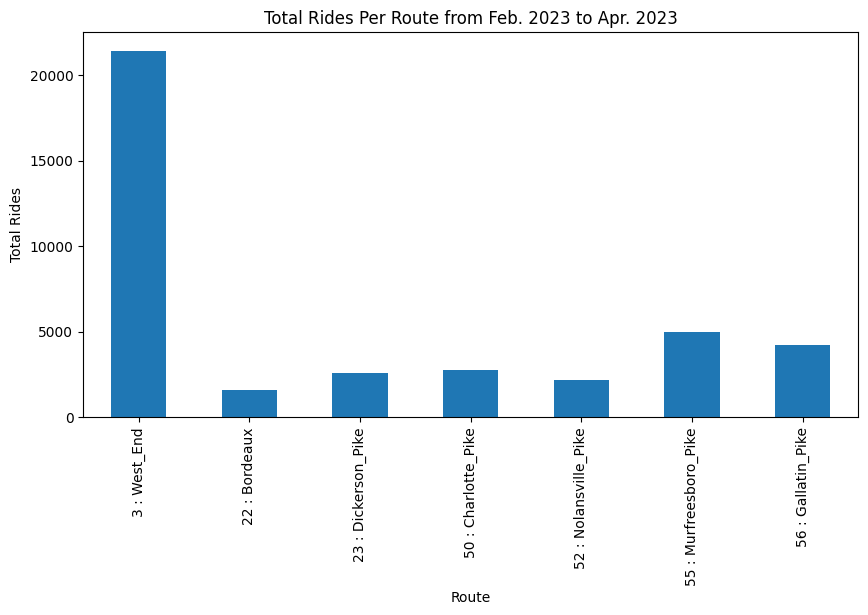

In [64]:
# total VU Rides on Frequent Service

# TODO: COMMENT THIS FUNCTION
def count_routes_in_dictionary(route_dict, df):
    return df[df['ROUTE'].isin(route_dict)]

# TODO: COMMENT THIS FUNCTION
def count_series(series):
    return series.groupby('ROUTE')['RIDE_DATE'].count()

# TODO: COMMENT THIS FUNCTION
def array_of_routes(dict):
    service_routes = []
    for route in dict:
        service_routes.append(str(route) + " : " + dict[route])
    return service_routes

# TODO: COMMENT THIS FUNCTION
def plot_service(WEGO_DICT):
    # Group the data by route and calculate the frequent service routes
    service_rides_count = count_series(count_routes_in_dictionary(WEGO_DICT, df))

    # set the header to "Total Rides" and only count the frequent service routes
    service_rides_count = service_rides_count.rename("Rides Per Service Route from Feb. 2023 to Apr. 2023")
    print(service_rides_count)

    # Array of Frequent Service Routes
    service_routes = array_of_routes(WEGO_DICT)

    # Visualize the data
    plt.figure(figsize=(10, 5))
    service_rides_count.plot.bar()
    plt.title("Total Rides Per Route from Feb. 2023 to Apr. 2023")
    plt.xlabel("Route")
    plt.ylabel("Total Rides")
    plt.xticks(range(len(service_routes)), service_routes)
    plt.show()

print("Total Rides Per Frequent Route from Feb. 2023 to Apr. 2023")
plot_service(WEGO_FREQUENT_SERVICE)

Total VU Rides on Local Service from Feb. 2023 to Apr. 2023
ROUTE
4      1141
6       799
7     30318
8      1312
9       302
14      661
17      782
18      507
19     1420
28      641
29      596
34      281
41       72
42      678
Name: Rides Per Service Route from Feb. 2023 to Apr. 2023, dtype: int64


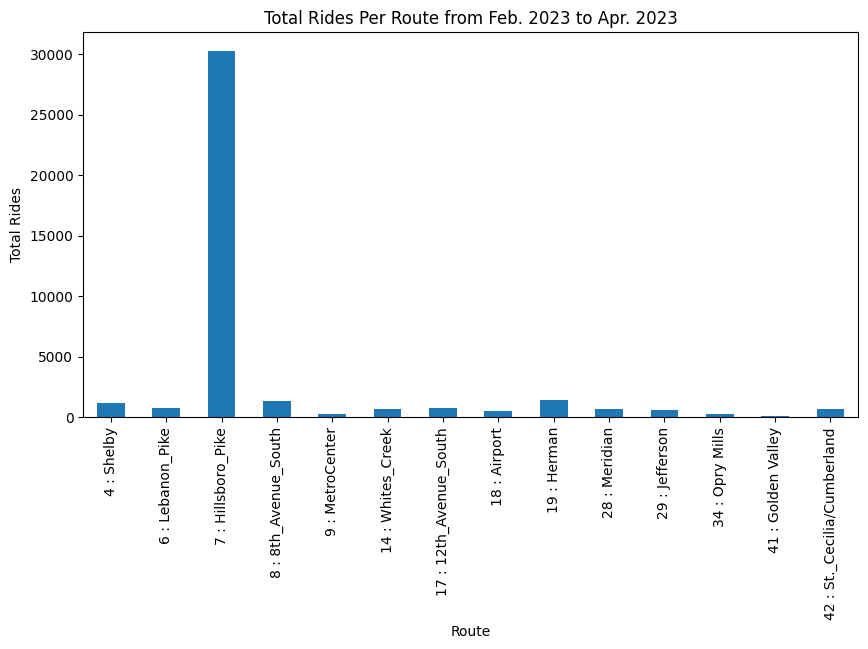

In [65]:
# total VU Rides on Local Service
print("Total VU Rides on Local Service from Feb. 2023 to Apr. 2023")
plot_service(WEGO_LOCAL_SERVICE)


Total VU Rides on Connector Service from Feb. 2023 to Apr. 2023
ROUTE
4      1141
6       799
7     30318
8      1312
9       302
14      661
17      782
18      507
19     1420
28      641
29      596
34      281
41       72
42      678
Name: Rides Per Service Route from Feb. 2023 to Apr. 2023, dtype: int64


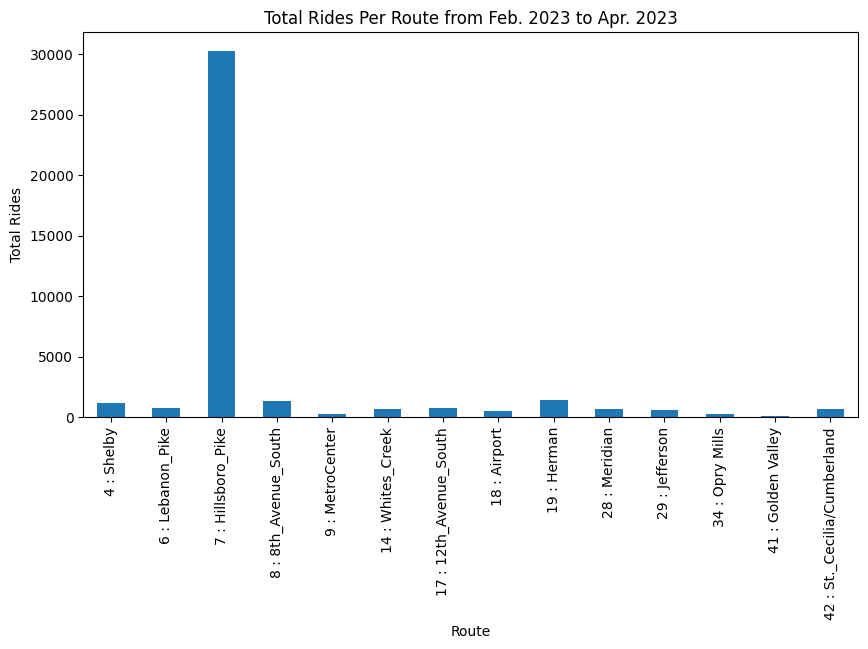

In [66]:
# total VU Rides on Connector Service
print("Total VU Rides on Connector Service from Feb. 2023 to Apr. 2023")
plot_service(WEGO_LOCAL_SERVICE)

Total VU Rides on Express Service from Feb. 2023 to Apr. 2023
ROUTE
84     567
86     116
87    1202
88      67
89     246
94      93
95     679
Name: Rides Per Service Route from Feb. 2023 to Apr. 2023, dtype: int64


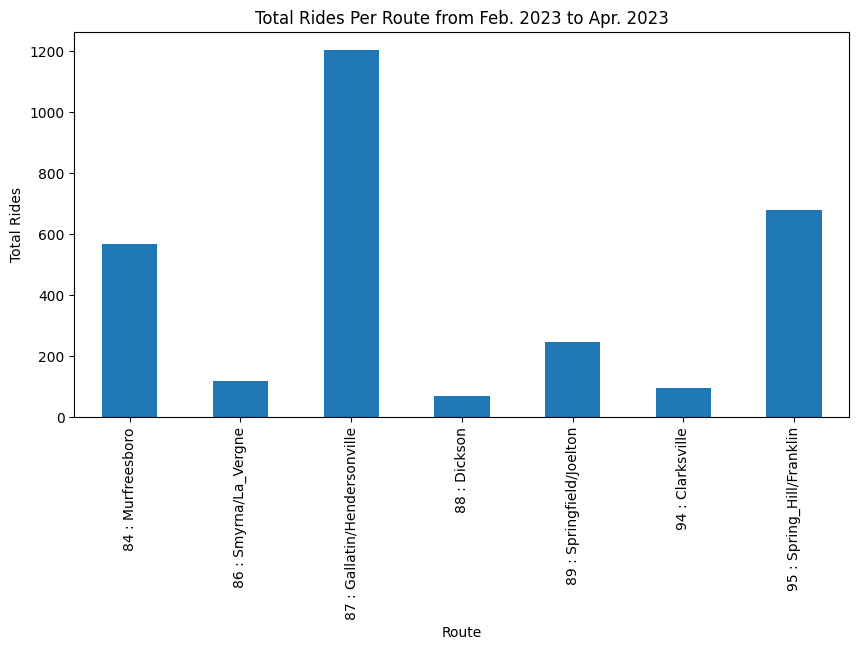

In [67]:
# total VU Rides on Express Service (Regional Transit Authority (RTA) Routes)
print("Total VU Rides on Express Service from Feb. 2023 to Apr. 2023")
plot_service(WEGO_EXPRESS_SERVICE)

Total VU Rides on Train Service from Feb. 2023 to Apr. 2023
ROUTE
93    129
Name: Rides Per Service Route from Feb. 2023 to Apr. 2023, dtype: int64


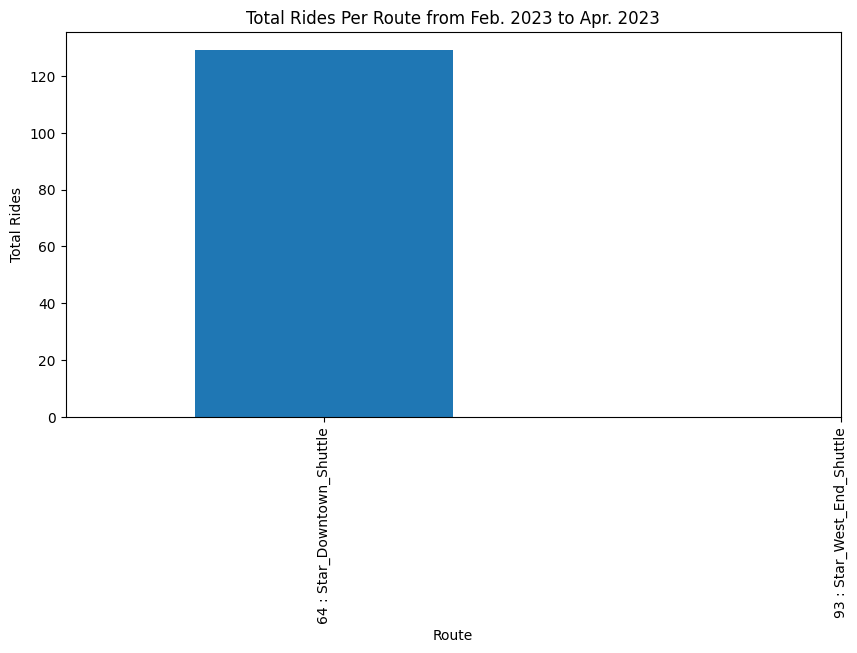

In [68]:
# total VU Rides on Train Service
print("Total VU Rides on Train Service from Feb. 2023 to Apr. 2023")
plot_service(WEGO_TRAIN_SERVICE)

Total VU Rides on Missing Service from Feb. 2023 to Apr. 2023
[16, 27, 47, 48, 59, 97, 98, 99]
ROUTE
16       1
27       1
47    2033
48      23
59       7
97       8
98      10
99      27
Name: Total Rides Per Missing Service Route from Feb. 2023 to Apr. 2023, dtype: int64


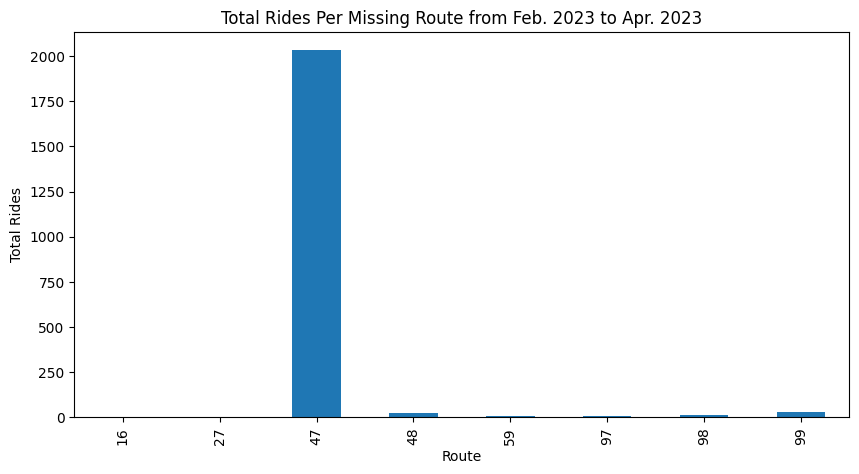

In [11]:
# total VU Rides on Missing Routes
print("Total VU Rides on Missing Service from Feb. 2023 to Apr. 2023")
print(missing_routes)
# Group the data by route and calculate the local service routes
missing_service_rides_count = count_series(count_routes_in_dictionary(missing_routes, df))

# set the header to "Total Rides" and only count the frequent service routes
missing_service_rides_count = missing_service_rides_count.rename("Total Rides Per Missing Service Route from Feb. 2023 to Apr. 2023")
print(missing_service_rides_count)

# Visualize the data
plt.figure(figsize=(10, 5))
missing_service_rides_count.plot.bar()
plt.title("Total Rides Per Missing Route from Feb. 2023 to Apr. 2023")
plt.xlabel("Route")
plt.ylabel("Total Rides")
plt.show()

All VU Ridership by Routes, including changes from Feb. 2023 to Apr. 2023


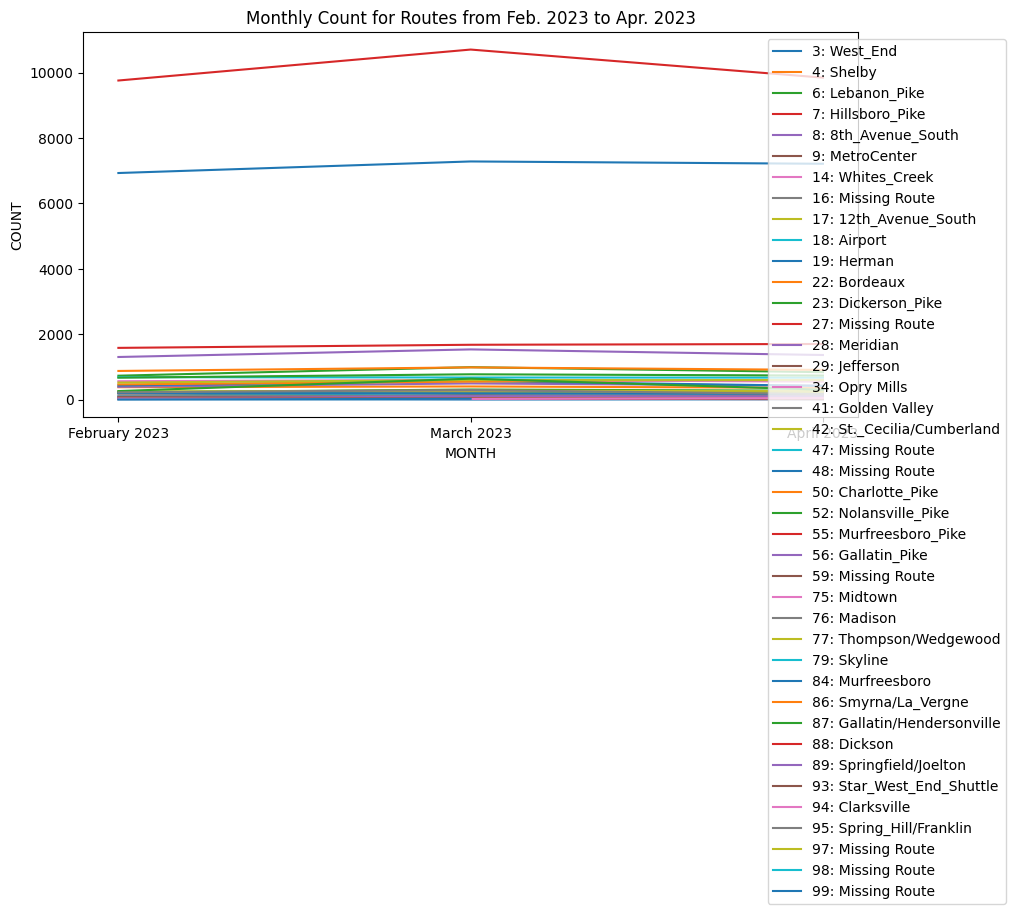

Top 6 Routes by Ridership from Feb. 2023 to Apr. 2023
    ROUTE  RIDERSHIP
3       7      30318
0       3      21430
23     55       4960
24     56       4202
21     50       2769
12     23       2561


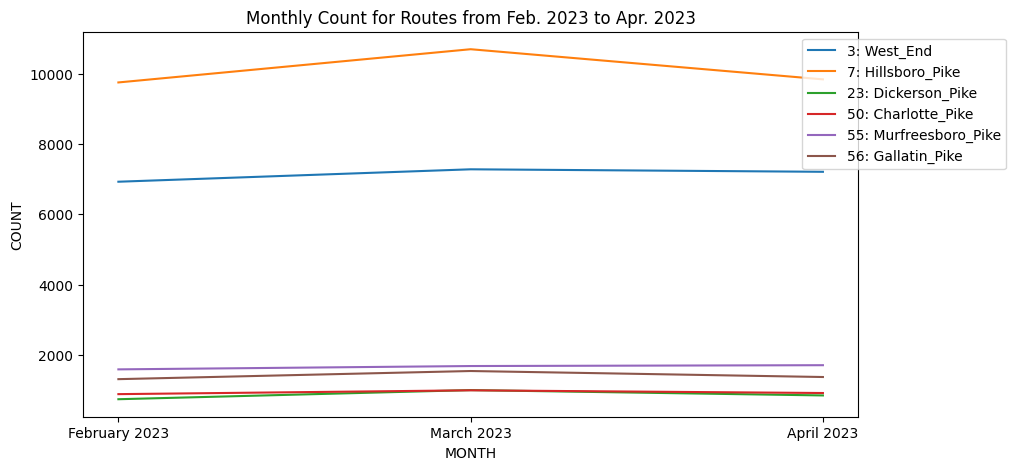

In [61]:
def plot_top_and_all_routes(route_month_counts):
    # graph all the routes
    plt.figure(figsize=(10, 5))
    for route in route_month_counts['ROUTE'].unique():
        if route in WEGO_ALL_ROUTES:
            route_data = route_month_counts[route_month_counts['ROUTE'] == route]
            plt.plot(route_data['MONTH'], route_data['COUNT'], label=(str(route) +": " + WEGO_ALL_ROUTES[route]))
        else:
            route_data = route_month_counts[route_month_counts['ROUTE'] == route]
            plt.plot(route_data['MONTH'], route_data['COUNT'], label=(str(route) +": " + "Missing Route"))

    # Customize the x-axis tick labels
    months = {2: 'February 2023', 3: 'March 2023', 4: 'April 2023'}  # Define the desired month labels
    plt.xticks(route_month_counts['MONTH'].unique(), [months[month] for month in route_month_counts['MONTH'].unique()])


    plt.xlabel('MONTH')
    plt.ylabel('COUNT')
    plt.title('Monthly Count for Routes from Feb. 2023 to Apr. 2023')
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
    plt.show()


    # Top 6 Routes by Total Ridership

    # Calculate the total ridership for each route
    route_ridership = route_month_counts.groupby('ROUTE')['COUNT'].sum().reset_index(name='RIDERSHIP')
    # Find the top 6 routes by total ridership
    top_6_routes = route_ridership.sort_values('RIDERSHIP', ascending=False).head(6)
    print("Top 6 Routes by Ridership from Feb. 2023 to Apr. 2023")
    print(top_6_routes)

    # Make a list of the top 6 routes
    top_6_routes_list = list(top_6_routes['ROUTE'])

    # Plot the top 6 routes
    plt.figure(figsize=(10, 5))
    for route in route_month_counts['ROUTE'].unique():
        if route in top_6_routes_list:
            if route in WEGO_ALL_ROUTES:
                route_data = route_month_counts[route_month_counts['ROUTE'] == route]
                plt.plot(route_data['MONTH'], route_data['COUNT'], label=(str(route) +": " + WEGO_ALL_ROUTES[route]))
            else:
                route_data = route_month_counts[route_month_counts['ROUTE'] == route]
                plt.plot(route_data['MONTH'], route_data['COUNT'], label=(str(route) +": " + "Missing Route"))

    # Customize the x-axis tick labels
    months = {2: 'February 2023', 3: 'March 2023', 4: 'April 2023'}  # Define the desired month labels
    plt.xticks(route_month_counts['MONTH'].unique(), [months[month] for month in route_month_counts['MONTH'].unique()])


    plt.xlabel('MONTH')
    plt.ylabel('COUNT')
    plt.title('Monthly Count for Routes from Feb. 2023 to Apr. 2023')
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
    plt.show()


# - All VU Ridership by Routes, including changes over time
print("All VU Ridership by Routes, including changes from Feb. 2023 to Apr. 2023")

# Calculate the total ridership for each route per month - Using MONTH and RIDE_DATE FROM ABOVE
total_route_month_count = df.groupby(['ROUTE', 'MONTH']).size().reset_index(name='COUNT')

plot_top_and_all_routes(total_route_month_count)

In [42]:
# Total VU Rides on WeGo by University Roles (Faculty, Staff Grad/Professional, Undergrad)
#   By class, Freshman, Sophomore, etc.
#   By school
#   By division

# TODO: Figure out how to get more information on the person - probably from the vunet
# Total VU Rides on WeGo by Student/Employee/Other
print("Total VU Rides on WeGo by Student/Employee from Feb. 2023 to Apr. 2023")


# Data Cleaning First!
# remove rows with missing employee_or_student, campus_id, first_name, last_name or CARD_ID_STATUS = UNKOWN
columns_to_check = ['CAMPUS_ID', 'FIRST_NAME', 'LAST_NAME', 'EMPLOYEE_OR_STUDENT', 'GPR_CORE_ID']
df_cleaned = df.dropna(subset=columns_to_check)

# Check how many entries remain
print("Total Number of Vanderbilt Scans in the We Go Bus System (Pre-Clean):", df.shape[0])
print("Total Number of Vanderbilt Scans in the We Go Bus System (Clean):", df_cleaned.shape[0])



# Student Month Comparsion
# Student Route Comparsion

# Other Month Comparsion
# Other Route Comparsion



Total VU Rides on WeGo by Student/Employee from Feb. 2023 to Apr. 2023
Total Number of Vanderbilt Scans in the We Go Bus System (Pre-Clean): 88310
Total Number of Vanderbilt Scans in the We Go Bus System (Clean): 57107
['ACTIVE' 'INACTIVE']


Employee VU Rides on WeGo - month to month comparison (February - April 2023)
List of Unique Months [2, 3, 4]
MONTH
2    18383
3    19742
4    18982
Name: Total Rides Per Month, dtype: int64


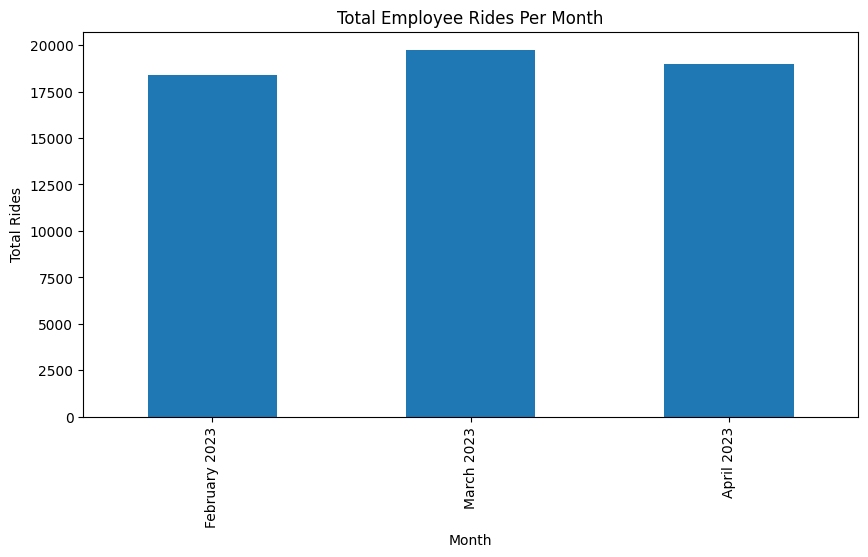

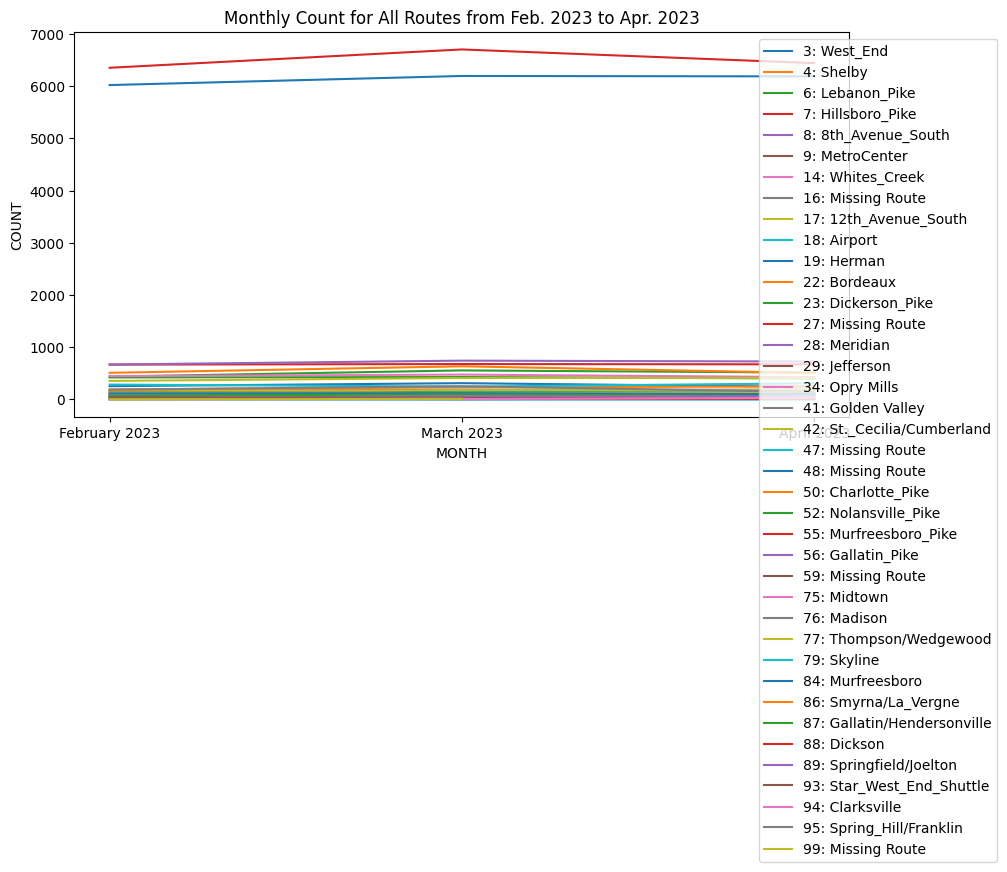

Top 6 Routes by Total Ridership from Feb. 2023 to Apr. 2023
    ROUTE  TOTAL RIDERSHIP
3       7            19499
0       3            18406
24     56             2141
23     55             2020
21     50             1654
12     23             1510


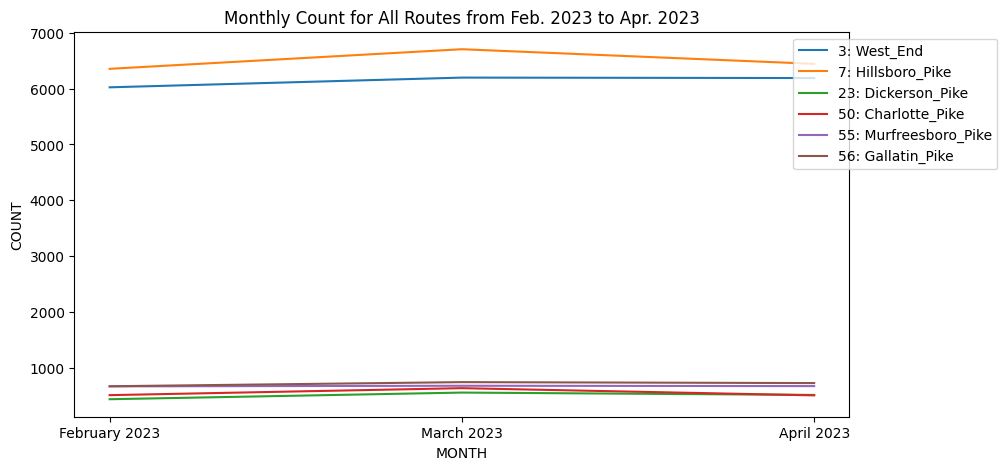

In [60]:
# Employee Month Comparsion

# total VU Rides on WeGo - month to month comparison (February - April 2023)
print("Employee VU Rides on WeGo - month to month comparison (February - April 2023)")

month_list = list(df_cleaned['MONTH'].unique())
month_list.sort()

print("List of Unique Months", month_list)

# Group the data by month and calculate the total number of rides per month
monthly_rides = df_cleaned.groupby('MONTH')['RIDE_DATE'].count()
# set the header to "Total Rides"
monthly_rides = monthly_rides.rename("Total Rides Per Month")
print(monthly_rides)

# Visualize the data
plt.figure(figsize=(10, 5))
monthly_rides.plot.bar()
plt.title("Total Employee Rides Per Month")
plt.xlabel("Month")
plt.ylabel("Total Rides")
plt.xticks(range(len(monthly_rides)), ['February 2023', 'March 2023', 'April 2023'])
plt.show()

# Employee Route Comparsion - All Routes and Top 6 Routes
print("Employee Route Comparsion - All Routes and Top 6 Routes")
# Calculate the total ridership for each route per month - Using MONTH and RIDE_DATE FROM ABOVE
route_month_counts = df_cleaned.groupby(['ROUTE', 'MONTH']).size().reset_index(name='COUNT')

# Visualize the Data
plot_top_and_all_routes(route_month_counts)

In [ ]:
# Carbon Emissions Saved by VU Ridership on WeGo

In [ ]:
# Further Analysis Ideas to figure impact etc. etc.
# - Machine Learning Model to predict future ridership